># 데이터 평가하기

In [6]:
import numpy as np
import matplotlib.pyplot as plt

___
>## 정답률의 함정

- 대부분의 경우 정답률이 식별에 유용한 지표이지만, 경향이 불분명하거나 한쪽 레이블에 치우쳐진 데이터의 경우 정답률 자체가 함정이 될 수 있음
- 아래 예제의 경우가 그렇다고 볼 수 있음

In [2]:
np.random.seed(42)

X_dataset = np.random.randn(1000,2)
y_dataset = np.random.randint(10, size = 1000) //9

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


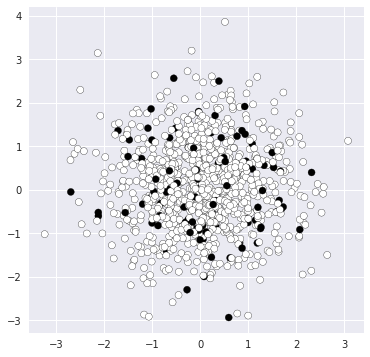

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(x = X_dataset[:,0], y = X_dataset[:,1], c = y_dataset, edgecolor = 'black')

- 위 예제를 train/test를 나눠 SVM으로 학습 시 다음과 같은 결과가 나올 수 있음

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset,
                                                   test_size = 0.2, random_state = 42)

classifier = SVC()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.91

In [15]:
classifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

- 정답률은 91%로 잘 식별했다고 할 수 있음
- 하지만 결과를 확인 시 모든 레이블이 0으로 추론되어 편향된 결과를 도출
- 이 경우 아무리 노력해도 식별경계를 정하기 어렵기 때문에, 식별기는 손실이 최대한 적게 되는 위치(모든 레이블이 0)에 식별경계를 만들 것

___
> ## 컨퓨전 매트릭스

- 전체의 정답률도 중요하지만, 케이스에 따라 개별 레이블의 정답률이 중요할 수도 있음
- 개별 래이블과 추론결과를 표를 통해 보여주는 방식이 컨퓨전 매트릭스이며, 아래와 같이 확인 가능
<img src=https://www.dataschool.io/content/images/2015/01/confusion_matrix2.png>

- 앞절의 유방암 데이터로 컨퓨전 매트릭스를 생성한다면 다음과 같이 작업 가능

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [20]:
# 데이터 호출
query = 'select * from testdataset.wdbc order by index'
dataset = pd.read_gbq(project_id = 'mlwithgcp', query = query)

# 문자 클래스 숫자로 변경
dataset['diagnostic'] = dataset['diagnostic'].apply(lambda X: 0 if X=='M' else 1)

# index열 제거
dataset.drop('index', axis = 1, inplace = True)

# array 변경
X_dataset = dataset.drop('diagnostic', axis = 1).as_matrix()
y_dataset = dataset.diagnostic.as_matrix()

# 정규화
scaler = MinMaxScaler()
X_dataset = scaler.fit_transform(X_dataset)

# 학습데이터 훈련데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset,
                                                   test_size = 0.2, random_state = 42)

# 훈련
classifier = SVC()
classifier.fit(X_train, y_train)
print('='*20)
classifier.score(X_test, y_test)

Requesting query... ok.
Job ID: 43c46ca9-d945-483b-ba86-a6350de317da
Query running...
Query done.
Cache hit.

Retrieving results...
Got 569 rows.

Total time taken 1.95 s.
Finished at 2018-10-29 23:12:13.


0.9473684210526315

- 정답률은 94.7%로, 컨퓨전 매트릭스는 다음과 같이 만들 수 있음

In [24]:
from sklearn.metrics import confusion_matrix

# 추론
y_pred = classifier.predict(X_test)

# 매트릭스 생성
confusion_matrix(y_test, y_pred)

array([[41,  5],
       [ 1, 67]])

- 해석하자면 0인 경우 41개와 1인경우 67개는 정확히 맞추었으나, 0인데 1로 추론한 경우가 5건, 1인데 0으로 추론한 경우가 1건 나옴
- 오답률이 낮은 편이지만, 암진단의 경우 악성인데 양성으로 판정한 5건은 문제가 될 수 있음
- 성능 파악 시 클래스의 개별적인 정답률도 고려할 필요가 있음